In [72]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import pandas as pd

titanic = pd.read_csv("https://raw.githubusercontent.com/Evanmj7/Decision-Trees/master/titanic.csv",
                      index_col=0)


titanic.head()
#titanic.pclass.value_counts()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
id,,,,,,,,,,,,
1,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,"St Louis, MO"
2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,"Montreal, PQ / Chesterville, ON"


In [73]:
# Let's ensure the columns we want to treat as continuous are indeed continuous by using pd.to_numeric
# The errors = 'coerce' keyword argument will force any values that cannot be
# cast into continuous variables to become NaNs.
continuous_cols = ['age', 'fare']
for col in continuous_cols:
    titanic[col] = pd.to_numeric(titanic[col], errors='coerce')

# Set categorical cols & convert to dummies
cat_cols = ['sex', 'pclass']
for col in cat_cols:
    titanic[col] = titanic[col].astype('category').cat.codes

titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
id,,,,,,,,,,,,
1,0,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,S,"St Louis, MO"
2,0,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,0,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,0,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
5,0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"


In [74]:
# Clean the dataframe. An alternative would be to retain some rows with missing values by giving
# a special value to nan for each column, eg by imputing some values, but one should be careful not to
# use information from the test set to impute values in the training set if doing this. Strictly speaking,
# we shouldn't be dropping the nans from the test set here (as we pretend we don't know what's in it) - but
# for the sake of simplicity, we will.

titanic = titanic.dropna()
titanic.shape

(1045, 12)

In [75]:
# Create list of regressors
regressors = continuous_cols + cat_cols

# Predicted var
y_var = ['survived']

In [76]:
# Create a test (25% of data) and train set
train, test = train_test_split(titanic, test_size=0.25)

In [77]:
# Now let's create an empty decision tree to solve the classification problem:
classifier = tree.DecisionTreeClassifier(max_depth=10, min_samples_split=5, ccp_alpha=.01)

In [79]:
# The last option, ccp_alpha, prunes low-value complexity from the tree to help
# avoid overfitting.

# Fit the tree with the data
classifier.fit(train[regressors], train[y_var])

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=10, min_samples_split=5)

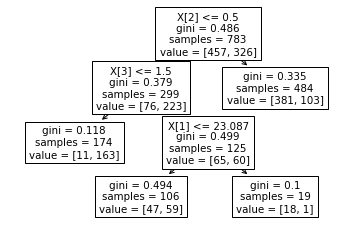

In [80]:
# Let's take a look at the tree:
tree.plot_tree(classifier);

In [81]:
classifier.score(train[regressors], train[y_var])

0.7931034482758621

In [82]:
classifier.score(test[regressors], test[y_var])

0.8015267175572519

Accuracy on train set is 0.7931
Accuracy on test set is 0.8015


c:\Users\kodom\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


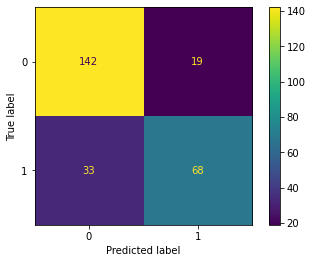

In [85]:
# How does it perform on the train and test data?
train_accuracy = round(classifier.score(train[regressors], train[y_var]), 4)
print(f'Accuracy on train set is {train_accuracy}')

test_accuracy = round(classifier.score(test[regressors], test[y_var]), 4)
print(f'Accuracy on test set is {test_accuracy}')

# Show the confusion matrix
plot_confusion_matrix(classifier, test[regressors], test[y_var]);